In [14]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import os
from pathlib import Path
import requests
import json
from scipy.stats import linregress, pearsonr
import scipy.stats as st

In [15]:
#load files
usps_transit_time_2016 = os.path.join(".", "output", "usps_transit_time_2016.csv")
usps_transit_time_2017 = os.path.join(".", "output", "usps_transit_time_2017.csv")
usps_transit_time_2018 = os.path.join(".", "output", "usps_transit_time_2018.csv")

#read data
usps_transit_time_2016_df = pd.read_csv(usps_transit_time_2016)
usps_transit_time_2017_df = pd.read_csv(usps_transit_time_2017)
usps_transit_time_2018_df = pd.read_csv(usps_transit_time_2018)
usps_transit_time_2018_df


,Shipping Agent,country,year,period_number,avg_2018_transit_time,count
0,USPS,US,2018,1,3.07,4683
1,USPS,US,2018,2,3.06,4800
2,USPS,US,2018,3,2.96,3575
3,USPS,US,2018,4,2.97,3441
4,USPS,US,2018,5,2.79,4180
5,USPS,US,2018,6,2.56,4109
6,USPS,US,2018,7,2.53,3162
7,USPS,US,2018,8,2.34,3187
8,USPS,US,2018,9,2.39,3719
9,USPS,US,2018,10,2.49,3669


In [16]:
# Concatenate both DataFrames
combined_transit_time_df = pd.concat([usps_transit_time_2016_df, usps_transit_time_2017_df, usps_transit_time_2018_df], ignore_index=True)
combined_transit_time_df

,Shipping Agent,country,year,period_number,avg_2016_transit_time,count,avg_2017_transit_time,avg_2018_transit_time
0,USPS,US,2016,1,3.02,2742,NaN,NaN
1,USPS,US,2016,2,2.81,2478,NaN,NaN
2,USPS,US,2016,3,2.68,2272,NaN,NaN
3,USPS,US,2016,4,2.91,2241,NaN,NaN
4,USPS,US,2016,5,2.56,2286,NaN,NaN
5,USPS,US,2016,6,2.60,2407,NaN,NaN
6,USPS,US,2016,7,2.77,2699,NaN,NaN
7,USPS,US,2016,8,2.67,2527,NaN,NaN
8,USPS,US,2016,9,2.83,3410,NaN,NaN
9,USPS,US,2016,10,2.60,3038,NaN,NaN


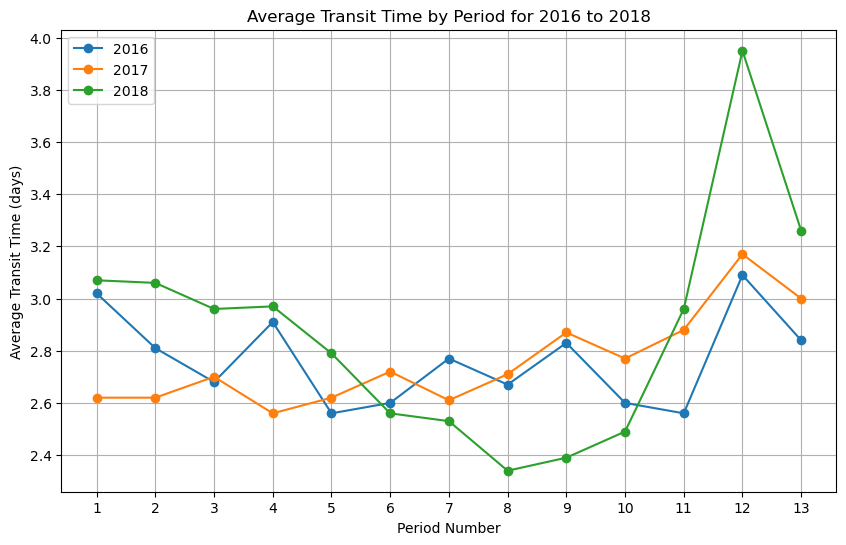

In [17]:
# Plot average transit time for 2017 and 2018
plt.figure(figsize=(10, 6))

# Plot for 2016
plt.plot(
    combined_transit_time_df[combined_transit_time_df["year"] == 2016]["period_number"],
    combined_transit_time_df[combined_transit_time_df["year"] == 2016]["avg_2016_transit_time"],
    marker="o",
    label="2016")

# Plot for 2017
plt.plot(
    combined_transit_time_df[combined_transit_time_df["year"] == 2017]["period_number"],
    combined_transit_time_df[combined_transit_time_df["year"] == 2017]["avg_2017_transit_time"],
    marker="o",
    label="2017")

# Plot for 2018
plt.plot(
    combined_transit_time_df[combined_transit_time_df["year"] == 2018]["period_number"],
    combined_transit_time_df[combined_transit_time_df["year"] == 2018]["avg_2018_transit_time"],
    marker="o",
    label="2018")

# Set x-axis ticks to only show 1 through 13
plt.xticks(ticks=range(1, 14))

# Add labels and title
plt.title("Average Transit Time by Period for 2016 to 2018")
plt.xlabel("Period Number")
plt.ylabel("Average Transit Time (days)")
plt.legend()
plt.grid(True)
plt.show()

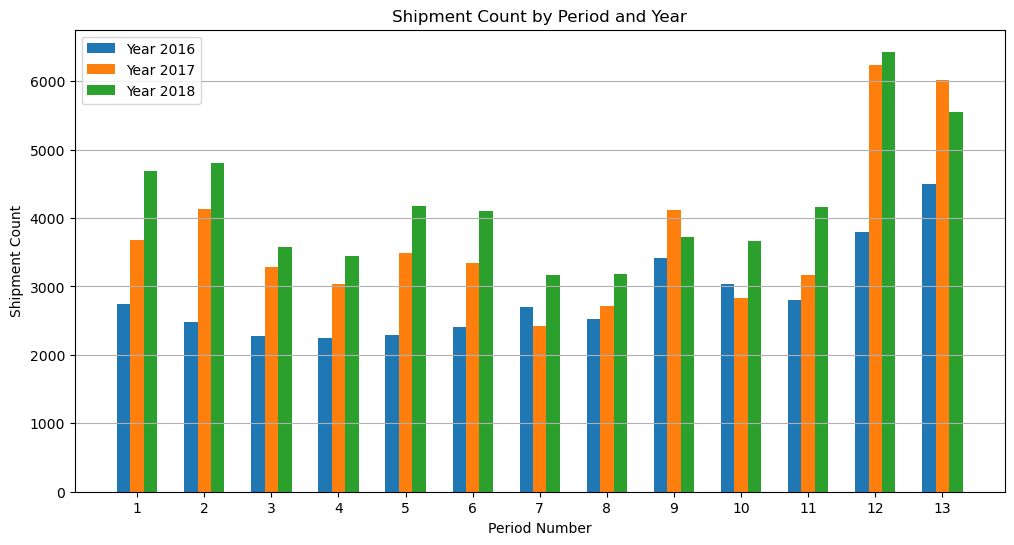

In [19]:
# Create a bar plot for shipment count by period for each year


# Increase the figure width to add more space
plt.figure(figsize=(12, 6))  # Wider figure

# Define offsets for each year
offsets = {2016: -0.2, 2017: 0, 2018: 0.2}

# Use narrower bars to increase spacing
bar_width = 0.2

# Plot each year with a different offset
for year in combined_transit_time_df["year"].unique():
    subset = combined_transit_time_df[combined_transit_time_df["year"] == year]
    plt.bar(subset["period_number"] + offsets[year], subset["count"], width=bar_width, label=f"Year {year}")

# Set x-axis ticks to only show 1 through 13
plt.xticks(ticks=range(1, 14), labels=range(1, 14))

# Add labels, title, legend, and grid
plt.title("Shipment Count by Period and Year")
plt.xlabel("Period Number")
plt.ylabel("Shipment Count")
plt.legend()
plt.grid(axis="y")
plt.show()